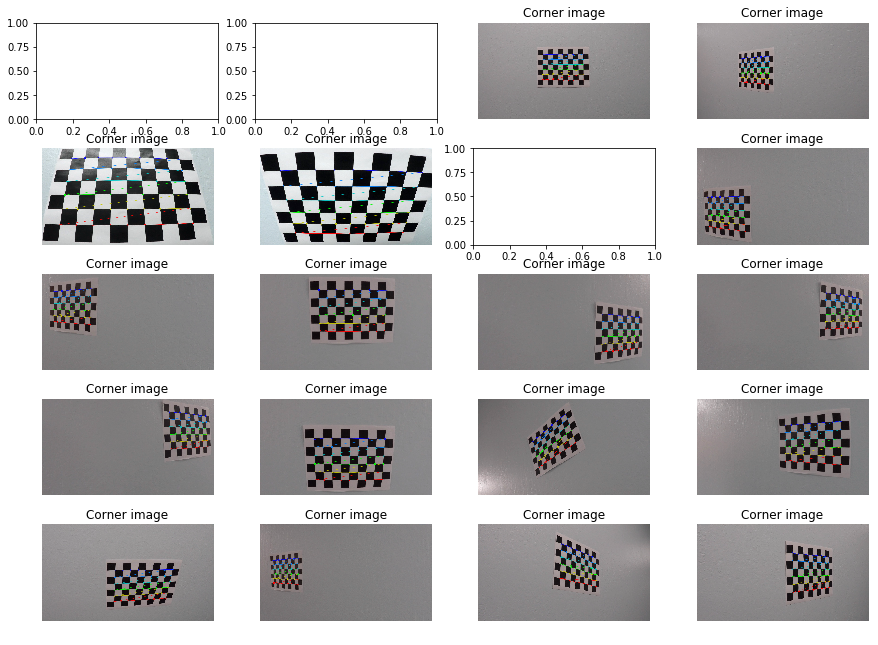

In [1]:
# Camera Calibration matrix and distortion coefiicients 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

# Arrays to store object points and image points from all the images
objPoints = []
imgPoints = []
 
# prepare object points 
objP = np.zeros((6*9,3), np.float32)
objP[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) #x, y coordinates

fig, axs = plt.subplots(5, 4, figsize=(15,11))
fig.subplots_adjust(hspace = 0.3)

axs = axs.ravel()
imgContainer = glob.glob('camera_cal/*.jpg')

for i, index in enumerate(imgContainer):
    image = cv2.imread(index)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    
    # if corners are found, add object points, image points
    if ret == True:
        imgPoints.append(corners)
        objPoints.append(objP)
        
        img = cv2.drawChessboardCorners(image, (9,6), corners, ret)
        axs[i].axis('off')
        axs[i].imshow(img)
        axs[i].set_title('Corner image')

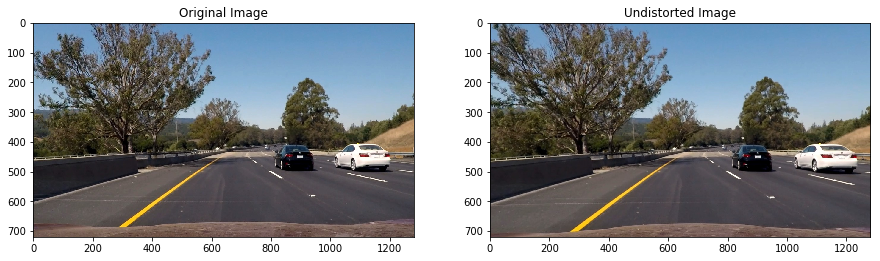

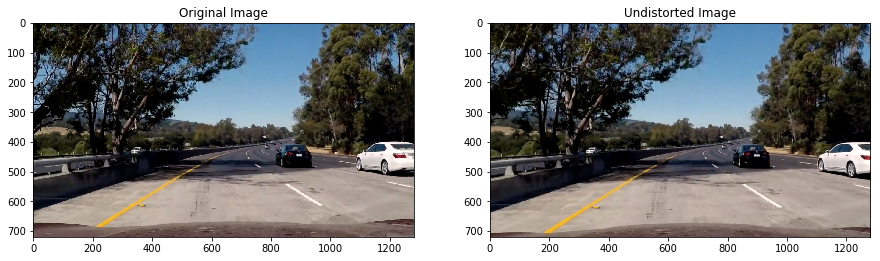

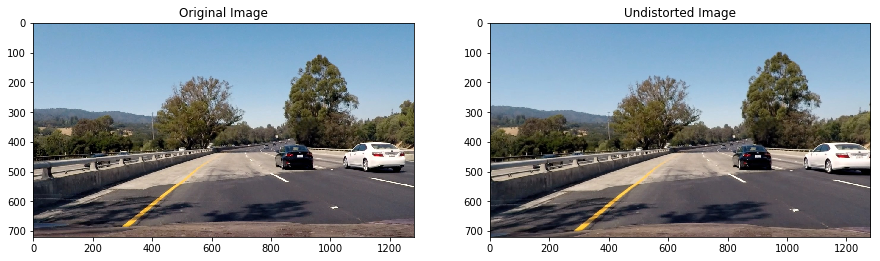

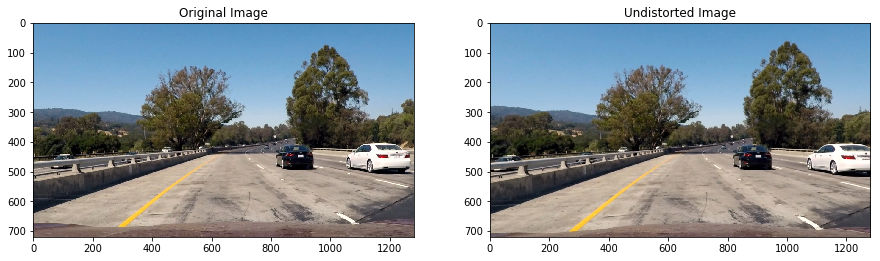

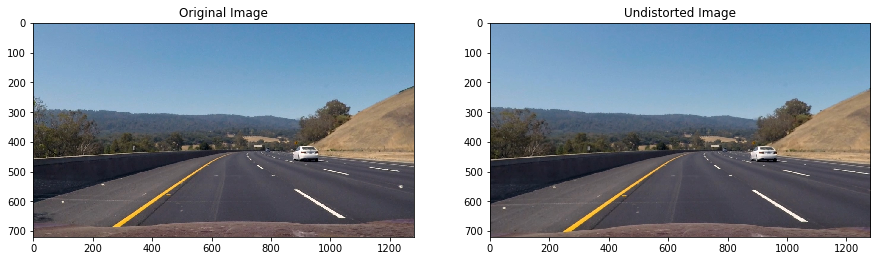

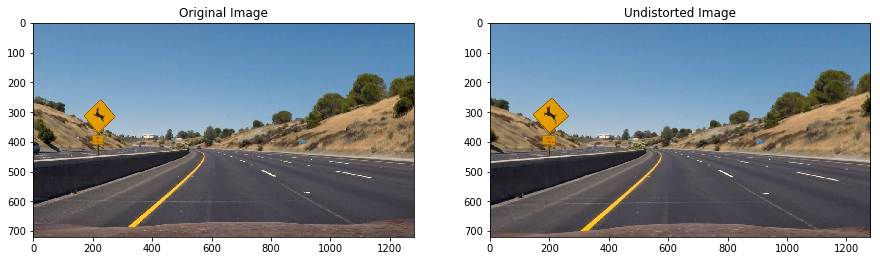

In [28]:
# these individual implementation steps are being followed from the lectures series
# undistortion

def singleUndistort(image):
    img = cv2.imread(image)
    img_shape = (img.shape[1], img.shape[0])
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objPoints, imgPoints, img_shape, None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist


def undistort(images):
    for image in images:
        img = cv2.imread(image)
        imgSize = (img.shape[1], img.shape[0])
        ret, mtx, dist,rvecs, tvecs = cv2.calibrateCamera(objPoints, imgPoints, imgSize, None, None)
        undistort = cv2.undistort(img, mtx, dist, None, mtx)
        
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,11))
        ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax1.set_title('Original Image')
        ax2.imshow(cv2.cvtColor(undistort, cv2.COLOR_BGR2RGB))
        ax2.set_title('Undistorted Image')
        # return undistort
images = glob.glob('./test_images/test*.jpg')
undistort(images)


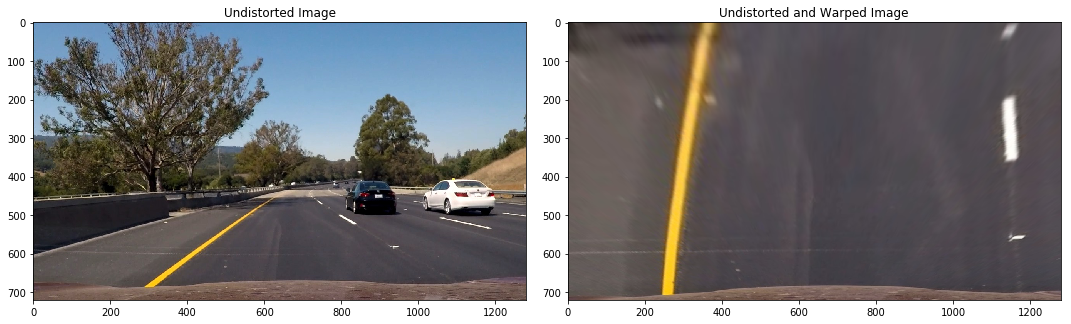

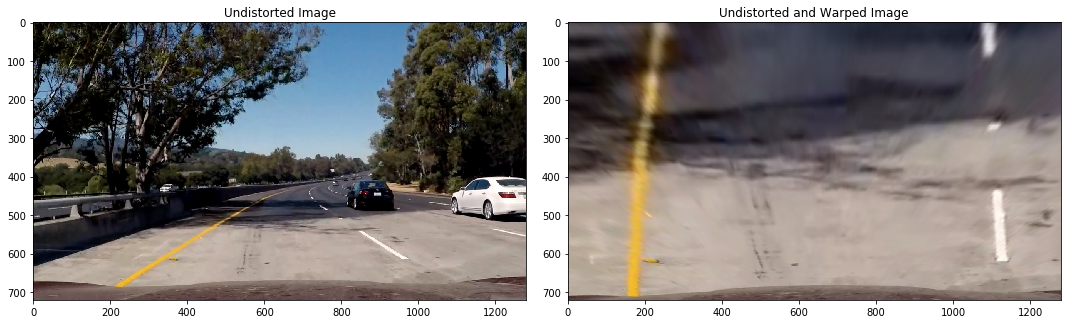

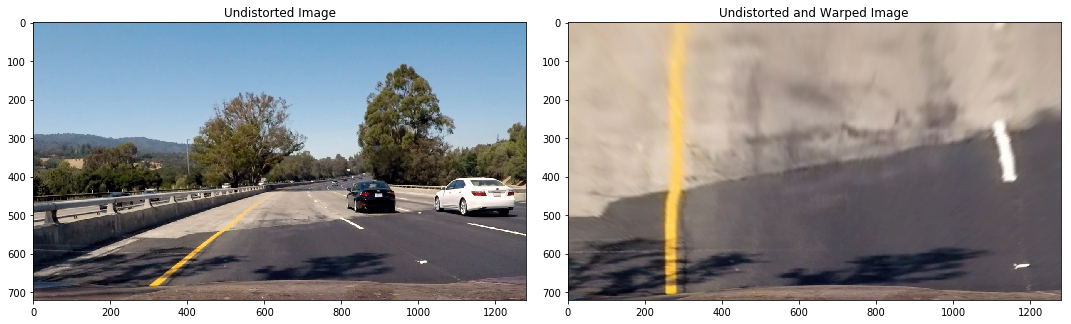

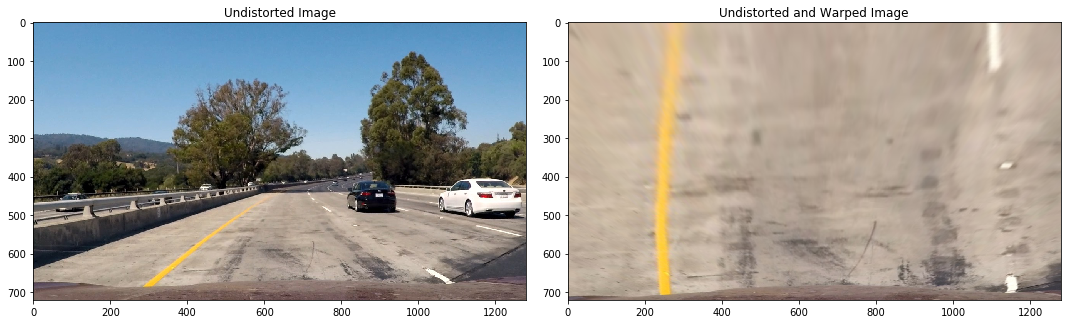

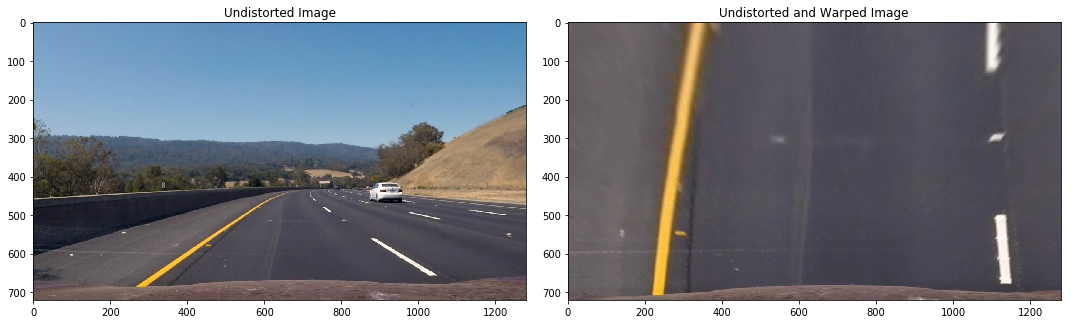

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


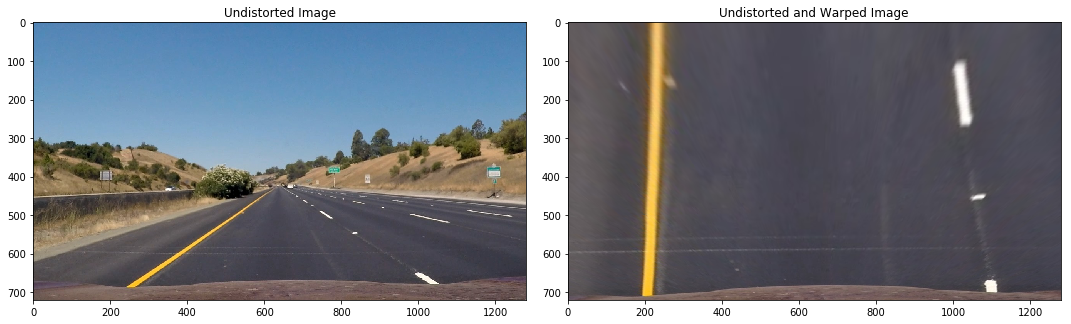

In [67]:
# Perspective Transform
# define both source and destination points to get the perspective transform and
# then creare the wraped image

def unwarpedImage(images):
    for image in images:
        img = cv2.imread(image)
        undst = singleUndistort(image)
        imgSize = (undst.shape[1], undst.shape[0])
        srcPoints = np.float32([[500, 480],[790, 480],[1250, 720],[220, 720]])
        dstPoints = np.float32([[0, 0], [1250,0], [1250,720 ],[220,720]])
        M = cv2.getPerspectiveTransform(srcPoints, dstPoints)
        warped = cv2.warpPerspective(undst, M, imgSize)
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 11))
        f.tight_layout()
        ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax1.set_title('Undistorted Image')
        ax2.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
        ax2.set_title('Undistorted and Warped Image')

images = glob.glob('./test_images/*.jpg')
unwarpedImage(images)

In [ ]:
# thresholding 